In [37]:
from Networks import MLP2
from Trainers import NavierStokes_2D_Trainer
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import jet

In [54]:
# 初始化模型
input_shape = (2,)  # 输入形状
output_shape = (3,)
model = MLP2(input_shape, output_shape, hidden_layers=[64, 64, 64, 64, 64],activation_function="tanh")

# 加载训练好的权重
model.load_state_dict(torch.load("model/PINN.pth",weights_only=True))


<All keys matched successfully>

In [55]:
start = 0.05  # 起始位置（0表示最开始）
stop = 0.95   # 结束位置（1表示最末尾）
colors = jet(np.linspace(start, stop, 256))
my_jet = LinearSegmentedColormap.from_list('part_jet', colors)

In [56]:
# 定义网格范围
x = torch.linspace(0, 2, 64)  # x 范围从 0 到 2，共 64 个点
y = torch.linspace(-0.1, 0.1, 16)  # y 范围从 -0.1 到 0.1，共 16 个点

# 使用 meshgrid 创建 2D 网格
x_grid, y_grid = torch.meshgrid(x, y, indexing='ij')  # 'ij' 保证顺序为 (x, y)

# 将网格展平为一个二维张量 (N, 2)，每一行代表一个 (x, y) 坐标
collocation_points = torch.stack([x_grid.flatten(), y_grid.flatten()], dim=1)

In [57]:
# 将模型设置为评估模式
model.eval()
with torch.no_grad():  # 关闭梯度计算，因为我们只是进行前向传播
    x_collocation, y_collocation = collocation_points[:, 0], collocation_points[:, 1]
    result_pred = model(x_collocation, y_collocation)

In [58]:
u_pred = result_pred[0].numpy()

In [59]:
x = np.linspace(0, 2, 64)
y = np.linspace(-0.1, 0.1, 16)
xx, yy = np.meshgrid(x, y)

(-0.1, 0.1)

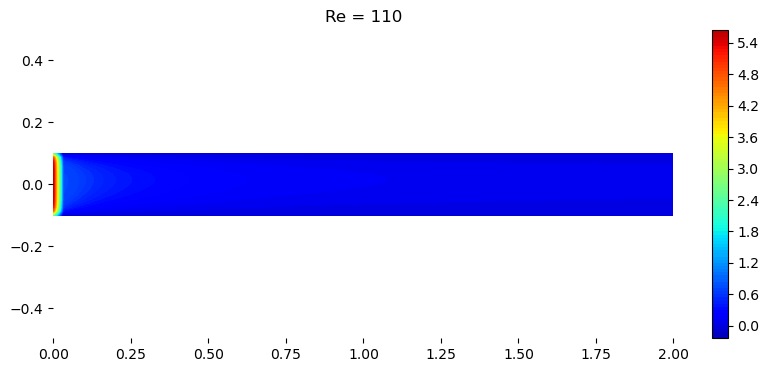

In [60]:
plt.figure(figsize=(10, 4))

c = plt.contourf(xx, yy, u_pred.reshape((64,16)).T, cmap=my_jet, levels=100)
plt.colorbar(c)
plt.axis('equal')
plt.title('Re = 110')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.set_xlim([0,0.4])
ax.set_ylim([-0.1,0.1])
# ax.set_xticks([0, 0.02, 0.04])
# ax.set_yticks([0, 0.02, 0.04])
# plt.savefig('result/Re110_PINN.png')

In [61]:
u_pred.max()

5.5895877